In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.physics import ves

In [2]:
ab2 = np.logspace(0, 2.5, 31)
print(ab2)

[  1.           1.21152766   1.46779927   1.77827941   2.15443469
   2.61015722   3.16227766   3.83118685   4.64158883   5.62341325
   6.81292069   8.25404185  10.          12.11527659  14.67799268
  17.7827941   21.5443469   26.10157216  31.6227766   38.3118685
  46.41588834  56.23413252  68.12920691  82.54041853 100.
 121.15276586 146.77992676 177.827941   215.443469   261.01572157
 316.22776602]


In [3]:
fopBlock = ves.VESModelling(ab2=ab2)
synth = [5, 10, 100, 300, 30]
data = fopBlock(synth)
# fig, ax = plt.subplots()
# fopBlock.drawData(ax, data);

In [4]:
thk = np.logspace(0, 1.5, 21)
# print(np.cumsum(thk))
fop = ves.VESRhoModelling(ab2=ab2, thk=thk)

08/08/24 - 10:32:49 - pyGIMLi - INFO - Found 1 regions.


In [5]:
inv = pg.Inversion(fop=fop)
inv.dataVals = data
inv.dataTrans = pg.trans.TransLog()
inv.modelTrans = pg.trans.TransLog()
inv.run(data, 0.02, startModel=100, maxIter=0)
# inv.model = pg.Vector(len(thk)+1, 100.0)
# inv.response = fop(inv.model)
# inv.errorVals = pg.Vector(len(data), 0.02)
# fop.createJacobian(inv.model)

22 [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]

In [6]:
tD = inv.dataTrans
tM = inv.modelTrans
inv.inv.data()

31 [100.08745003995519, 100.15431184496127, 100.27133458212494, 100.47468253725656, 100.82442163640242, 101.41725725951719, 102.40201699889873, 103.99321057762384, 106.47145930881837, 110.15229965805725, 115.30412073360134, 122.01205082437562, 130.01867883069855, 138.60509135124332, 146.5785336178627, 152.40052856212927, 154.44767637288655, 151.37171907374136, 142.50415807390021, 128.20232841707713, 109.97313602327797, 90.22029674416736, 71.60756415685572, 56.26173122865003, 45.18876267422169, 38.19265392126816, 34.28838078468257, 32.30612045020045, 31.3304489127231, 30.824162011169122, 30.534076730026072]

22 [-0.18794531427293382, -0.40846377575017645, -0.46702527350443435, -0.43908859355572427, -0.3594055774494141, -0.24719608392943013, -0.11513587139185427, 0.02689612211757429, 0.17023935468642568, 0.3069098252280219, 0.4295901624535915, 0.5318722481141884, 0.6085780366809204, 0.6560685078787052, 0.6725306952643605, 0.658273334725156, 0.6160130081543291, 0.5509946521116207, 0.4706720792771639, 0.38375070785065835, 0.2987172964472975, 0.6892750535844563]


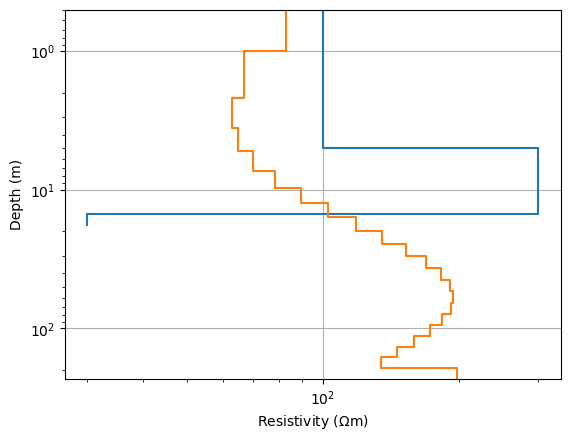

In [7]:
dg = inv.dataGradient()
print(dg)
fig, ax = plt.subplots()
pg.viewer.mpl.drawModel1D(ax, model=synth)
pg.viewer.mpl.drawModel1D(ax, thk, np.exp(dg*0.99)*inv.model, plot='loglog')


In [8]:
inv.chi2()

782.5703524112506

In [9]:
inv.model = np.exp(dg*0.99)*inv.model
inv.response = fop(inv.model)
fop.createJacobian(inv.model)
print(inv.chi2())

1740.8365105713435


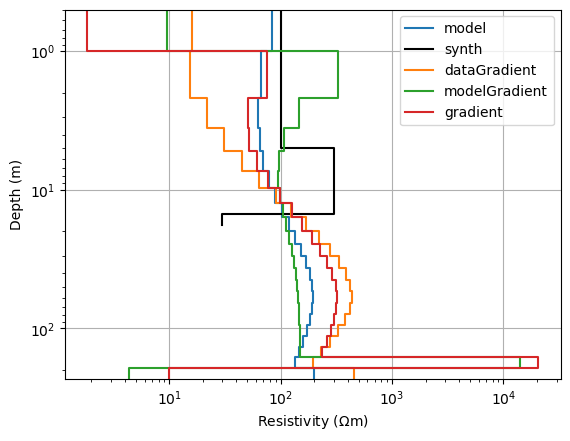

In [10]:
dg = inv.dataGradient()
mg = -inv.modelGradient() * 10
fig, ax = plt.subplots()
pg.viewer.mpl.drawModel1D(ax, thk, inv.model, label="model")
pg.viewer.mpl.drawModel1D(ax, model=synth, label="synth", color="black")
pg.viewer.mpl.drawModel1D(ax, thk, np.exp(dg*0.99)*inv.model, plot='loglog', label="dataGradient")
pg.viewer.mpl.drawModel1D(ax, thk, np.exp(mg*0.99)*inv.model, plot='loglog', label="modelGradient")
pg.viewer.mpl.drawModel1D(ax, thk, np.exp((mg+dg)*0.99)*inv.model, plot='loglog', label="gradient")
ax.legend()

In [11]:
from pygimli.frameworks import lineSearch

In [12]:
inv = pg.Inversion(fop=fop)
inv.dataVals = data
inv.dataTrans = pg.trans.TransLog()
inv.modelTrans = pg.trans.TransLog()
inv.run(data, 0.02, startModel=100, correlationLengths=[3, 3, 3], maxIter=0)
print(inv.chi2())
for iter in range(30):
    inv.lam = 10*0.8**iter
    dm = -inv.gradient()
    tau, resp = lineSearch(inv, dm, method="exact", taumin=0.001, logScale=True)
    inv.model = np.exp(dm*tau)*inv.model
    inv.response = fop(inv.model)
    fop.createJacobian(inv.model)
    print(iter, tau, inv.chi2())

08/08/24 - 10:32:51 - pyGIMLi - INFO - Creating GeostatisticConstraintsMatrix for region 0 with: I=[3, 3, 3], dip=0, strike=0
08/08/24 - 10:32:51 - pyGIMLi - INFO - Creating forward mesh from region infos.
08/08/24 - 10:32:51 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
08/08/24 - 10:32:51 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 45 Cells: 44 Boundaries: 23
08/08/24 - 10:32:51 - pyGIMLi - INFO - Cache c:\Guenther.T\src\gimli\gimli\pygimli\math\matrix.py:createCm05 restored (0.0s x 18): C:\Guenther.T\Anwendungsdaten\pygimli\Cache\7947269444493245716


782.5703524112506
0 1.0 269.5859220153493
1 0.501187233627272 190.37480671103356
2 0.12589254117941676 139.91764855897077
3 0.0446683592150963 132.4041092715459
4 0.1778279410038923 125.31731498768423
5 0.501187233627272 75.2296346806345
6 0.08912509381337455 66.0027792640484
7 0.707945784384138 53.33749247987962
8 0.25118864315095796 32.88177967544901
9 0.1778279410038923 28.00295382214001
10 1.0 13.472862926018454
11 0.3548133892335753 11.4309500069569
12 0.501187233627272 9.356395695568954
13 0.25118864315095796 8.165591705833995
14 1.0 6.311218070226793
15 0.25118864315095796 5.305802819049772
16 0.501187233627272 4.757665588371451
17 0.3548133892335753 4.375621630058508
18 0.3548133892335753 4.01266090867629
19 0.501187233627272 3.6806871588089245
20 0.3548133892335753 3.396131036619349
21 0.3548133892335753 3.159846050050354
22 0.501187233627272 2.930901549039563
23 0.3548133892335753 2.7367581946962405
24 0.3548133892335753 2.5709794866115767
25 0.501187233627272 2.4109812167865

0.4006
0.4006


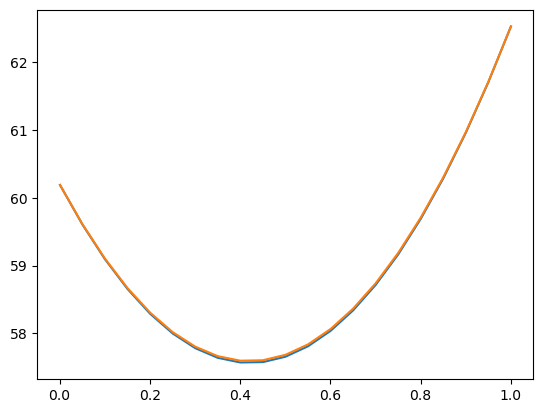

In [13]:
dm = -inv.gradient()
# print(lineSearch(inv, dm, method="exact", taumin=0.001, logScale=True)[0])
print(lineSearch(inv, dm, method="exact", taumin=0.001, logScale=False, show=True)[0])
# print(lineSearch(inv, dm, method="inter", taumin=0.001, logScale=True)[0])
print(lineSearch(inv, dm, method="inter", taumin=0.001, logScale=False, show=True)[0])

(0.4213513680852284, None)

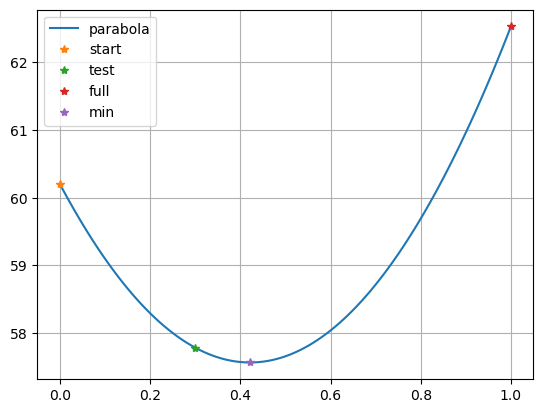

In [14]:
lineSearch(inv, dm, method="quad", show=True)

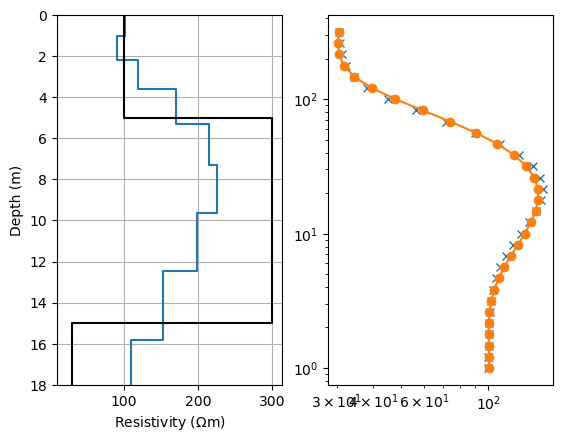

In [15]:
fig, ax = plt.subplots(ncols=2)
pg.viewer.mpl.drawModel1D(ax[0], thk, inv.model, label="model")
pg.viewer.mpl.drawModel1D(ax[0], model=synth, label="synth", color="black")
ax[1].loglog(data, ab2, "x")
ax[1].loglog(inv.response, ab2, "o-", label="response")

In [16]:
from pygimli.core.trans import str2Trans

In [17]:
print(str2Trans('symlog0.01'))